In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# installing Factor Analyzer
! pip install factor_analyzer

In [ ]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Matplotlib에 나눔바른고딕 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
import pandas as pd
data_all = pd.read_csv('/content/drive/MyDrive/ESAA OB 2조/방학 프로젝트/데이터/최종_최종_병합_데이터.csv')

In [ ]:
data_all.shape

(31, 30)

In [ ]:
data_all.columns

Index(['이름', '65세 이상_인구', '고령화율', '노인1천명당_재가복지시설수', '노인1천명당_주거복지시설수',
       '노인1천명당_의료복지시설수', '노인1천명당_여가복지시설수_경로당', '노인1천명당_여가복지시설수_노인교실',
       '노인1천명당_노인돌봄서비스수행기관수', '노인1천명당_무료급식소수', '노인1천명당_치매안심센터수',
       '노인1천명당_자립형일자리수행기관수', '고령자밀집도지수', '복지시설다양성지수', '교통취약노인수', '사고건수',
       '보호구역 수', '경제활동참가율', '금융취약도지수', '국민기초생활보장_독거노인_수급자비율', '저소득_독거노인_비율',
       '일반_독거노인_비율', '독거노인_합계', '독거노인_비율', '독거노인_증감인원수', '월경제활동인구수', '월대출평균잔액',
       '월소득평균', '월신용평점평균', '월카드총이용금액평균'],
      dtype='object')

In [ ]:
data = data_all.drop(['이름'],axis = 1)

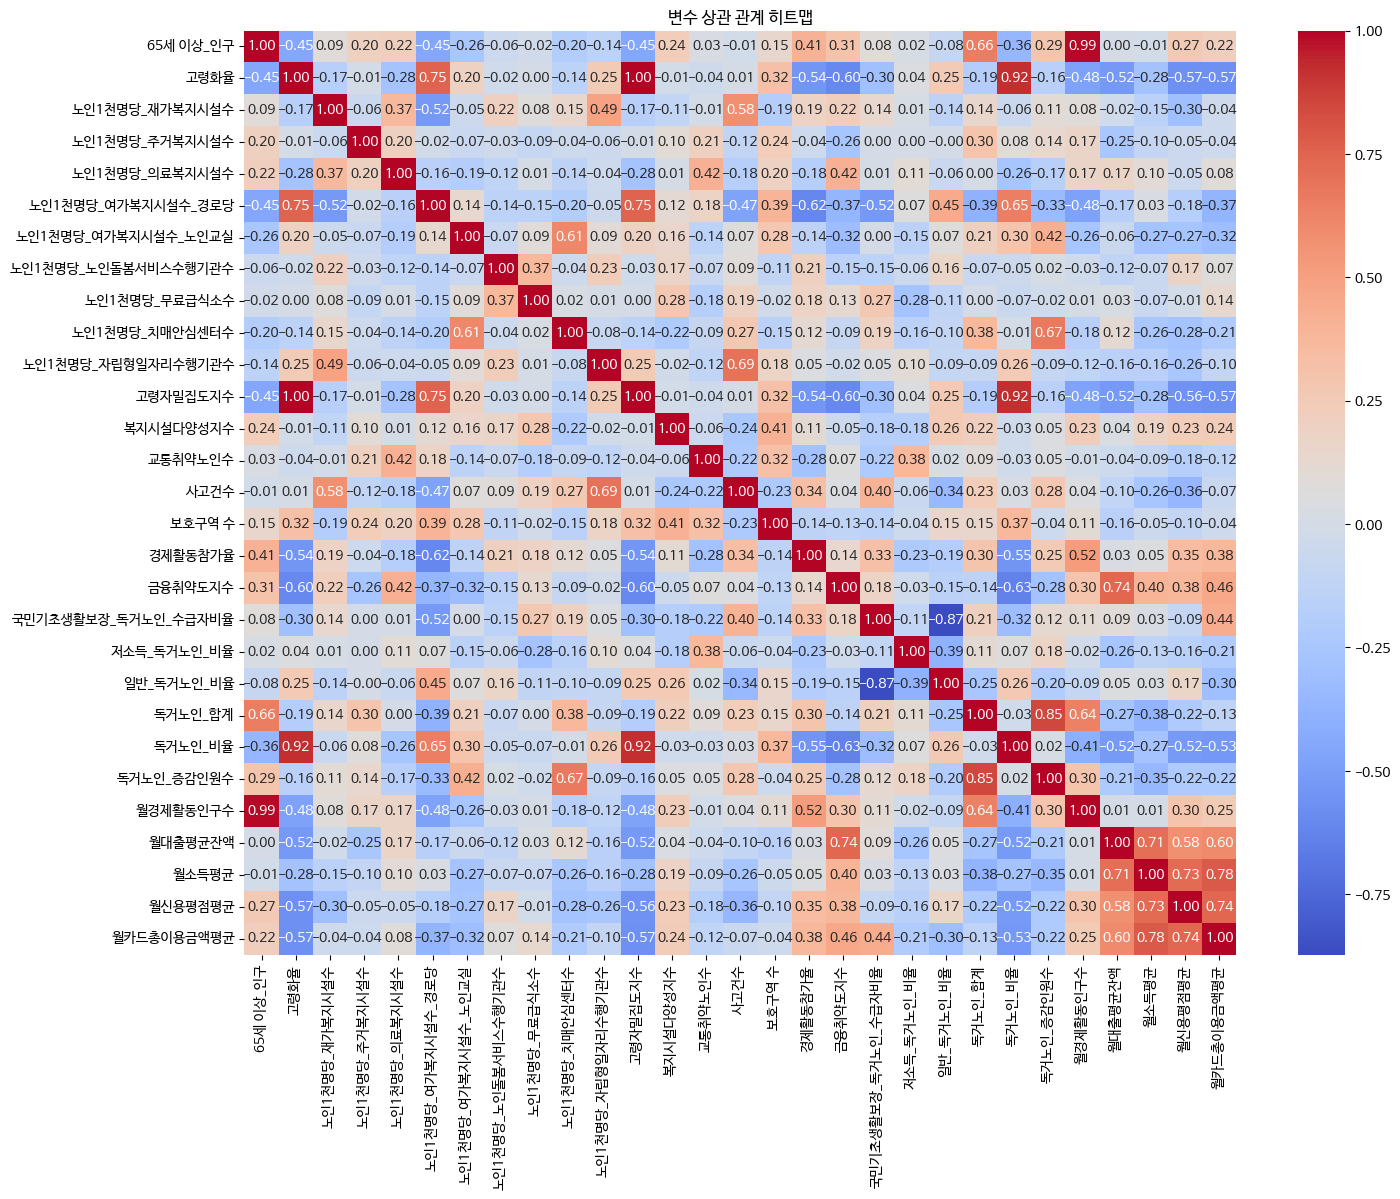

In [ ]:
# 상관관계 히트맵
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수 상관 관계 히트맵')
plt.show()

In [ ]:
cols_to_drop = [
    '경제활동참가율', '사고건수', '보호구역 수',
    '일반_독거노인_비율', '65세 이상_인구',
    '독거노인_증감인원수', '저소득_독거노인_비율','복지시설다양성지수', # VIF

    '노인1천명당_의료복지시설수',
    '노인1천명당_여가복지시설수_경로당',
    '월경제활동인구수',
    '교통취약노인수',
    '독거노인_합계',
    '노인1천명당_주거복지시설수',
    '노인1천명당_노인돌봄서비스수행기관수' # 내맘대로~
]

data = data.drop(columns=cols_to_drop)

In [ ]:
import numpy as np
corr_matrix = np.corrcoef(data, rowvar=False)
corr_det = np.linalg.det(corr_matrix)
print("상관행렬 determinant:", corr_det)

상관행렬 determinant: 3.466663906070703e-11


In [ ]:
# Bartlett 검정
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(data)
chi_square_value, p_value

(np.float64(590.0884608936556), np.float64(3.931827667052735e-74))

In [ ]:
# KMO(Kaiser-Meyer-Olkin) 검사
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(data)

In [ ]:
kmo_model

np.float64(0.6097737020480162)

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax',method = 'ml').fit(data)
## FactorAnalyzer 안에 다양한 인자들이 있음(n_factors / rotation / method 등.. 얘네를 계속 바꿔가면서 실험해보면 좋을 듯)

# 요인 적재량 출력
print("Factor loadings (PAF)")

# 요인적재 행렬 생성
lmatrix = pd.DataFrame(
    fa.loadings_,
    index=list(data.columns),
    columns=['인자 1', '인자 2', '인자 3', '인자 4', '인자 5']
)

# 각 변수별 최대 절대 적재값 위치 찾기
max_loading_mask = lmatrix.abs().eq(lmatrix.abs().max(axis=1), axis=0)

# 스타일링 함수: 최대 loading 셀에만 색칠
def highlight_max(df):
    # CSS 스타일 DataFrame 생성
    style_df = pd.DataFrame('', index=df.index, columns=df.columns)
    style_df[max_loading_mask] = 'background-color: lightblue'
    return style_df

# 스타일 적용
styled_lmatrix = lmatrix.style.apply(highlight_max, axis=None)

styled_lmatrix

Factor loadings (PAF)


,인자 1,인자 2,인자 3,인자 4,인자 5
고령화율,0.963267,-0.160320,-0.007724,-0.192503,-0.082495
노인1천명당_재가복지시설수,-0.176193,-0.324920,0.015657,0.111838,0.342007
노인1천명당_여가복지시설수_노인교실,0.174089,-0.088147,0.705197,-0.083762,-0.058466
노인1천명당_무료급식소수,0.035590,0.022307,-0.009505,0.033437,0.311985
노인1천명당_치매안심센터수,-0.154495,-0.170219,0.908832,0.037770,0.101331
노인1천명당_자립형일자리수행기관수,0.259755,-0.150371,-0.091723,0.014452,0.251590
고령자밀집도지수,0.963329,-0.160130,-0.008134,-0.192422,-0.082252
금융취약도지수,-0.451789,0.101129,-0.204843,0.737990,0.151490
국민기초생활보장_독거노인_수급자비율,-0.238493,0.054976,0.097587,-0.035794,0.819913
독거노인_비율,0.875943,-0.102200,0.133151,-0.278216,-0.096065


In [ ]:
# 1. 변수마다 가장 크게 적재된 인자의 인덱스를 구함 (0부터 시작)
dominant_factors = lmatrix.abs().idxmax(axis=1)

# 2. 해당 정보를 새로운 컬럼으로 추가
lmatrix['주된 인자'] = dominant_factors

# 3. 주된 인자 기준으로 정렬
sorted_lmatrix = lmatrix.sort_values(by='주된 인자')

# 4. 스타일링 재적용 (색상 강조 포함)
sorted_max_loading_mask = sorted_lmatrix.iloc[:, :-1].abs().eq(
    sorted_lmatrix.iloc[:, :-1].abs().max(axis=1), axis=0
)

def highlight_max_sorted(df):
    style_df = pd.DataFrame('', index=df.index, columns=df.columns)
    style_df.iloc[:, :-1] = sorted_max_loading_mask.replace(True, 'background-color: lightblue').fillna('')
    return style_df

styled_sorted_lmatrix1 = sorted_lmatrix.style.apply(highlight_max_sorted, axis=None)

# 출력
styled_sorted_lmatrix1

,인자 1,인자 2,인자 3,인자 4,인자 5,주된 인자
고령화율,0.963267,-0.160320,-0.007724,-0.192503,-0.082495,인자 1
노인1천명당_자립형일자리수행기관수,0.259755,-0.150371,-0.091723,0.014452,0.251590,인자 1
고령자밀집도지수,0.963329,-0.160130,-0.008134,-0.192422,-0.082252,인자 1
독거노인_비율,0.875943,-0.102200,0.133151,-0.278216,-0.096065,인자 1
월소득평균,-0.081919,0.842874,-0.157484,0.355489,0.019613,인자 2
월신용평점평균,-0.462691,0.757085,-0.218471,0.107286,-0.252066,인자 2
월카드총이용금액평균,-0.398349,0.787738,-0.201538,0.132759,0.396973,인자 2
노인1천명당_여가복지시설수_노인교실,0.174089,-0.088147,0.705197,-0.083762,-0.058466,인자 3
노인1천명당_치매안심센터수,-0.154495,-0.170219,0.908832,0.037770,0.101331,인자 3
금융취약도지수,-0.451789,0.101129,-0.204843,0.737990,0.151490,인자 4
